In [ ]:
import numpy as np
from timeit import default_timer as timer

In [ ]:
def evalf(x):
  f=sum((x[i]-1)**2 + (x[0]-x[i]**2)**2  for i in range(len(x)))
  return f

In [ ]:
def evalg(x):
  n=len(x)
  gr=np.array([2*(x[0]-1) + 2*(x[0] - x[0]**2)*(1-2*x[0]) + sum(2*(x[0]-x[i]**2) for i in range(1,n))])
  for i in range(1,n):
    gr=np.append(gr, 2*(x[i] - 1) + 2*(x[0] - x[i]**2)*(-2*x[i]))
  return gr.reshape((n,1))

In [ ]:
def evalh(x):
  n=len(x)
  hes=np.zeros((n,n))
  hes[0][0]=2+ 2*((1-2*x[0])**2) - 4*(x[0]-x[0]**2) + 2*(n-1)
  for i in range(1,n):
    hes[i][i]=2+8* (x[i]**2) -4*(x[0]-x[i]**2)
    hes[0][i]=-4*x[i]
    hes[i][0]=-4*x[i]
  return hes


In [ ]:
def computebk(s_k,y_k,b_k):
  i=np.identity(b_k.shape[0])
  meu_k=1/(np.matmul(y_k.T,s_k))
  return np.add(np.matmul(np.subtract(i,meu_k*np.matmul(s_k,y_k.T)),np.matmul(b_k,np.subtract(i,meu_k*np.matmul(y_k,s_k.T)))),meu_k*np.matmul(s_k,s_k.T))

In [ ]:
def steplength_backtracking(x,alpha,rho,gamma,dir,grad):
  while evalf(np.subtract(x,alpha*dir))>evalf(x)-gamma*alpha*np.matmul(grad.T,dir):
    alpha=rho*alpha
  return alpha

In [ ]:
def compute_minimizer(x_start,tol,algorithm,*args):
  x=x_start
  x1=x_start
  gradf=evalg(x)
  k=0
  if algorithm=='BFGS backtracking':
    b_k=args[0]
    alpha=args[1]
    rho=args[2]
    gamma=args[3]
    dir = np.matmul(b_k,gradf)
  if algorithm=='Newtons backtracking':
    alpha=args[0]
    rho=args[1]
    gamma=args[2]
    hes=evalh(x)
    dir=np.matmul(np.linalg.inv(evalh(x)),gradf)
  while np.linalg.norm(gradf)> tol:
    if algorithm=='BFGS backtracking':
      x=x1
      step_length=steplength_backtracking(x,alpha,rho,gamma,dir,gradf)
      x1=np.subtract(x,step_length*dir)
      s_k=np.subtract(x1,x)
      y_k=np.subtract(evalg(x1),evalg(x))
      gradf=evalg(x1)
      b_k=computebk(s_k,y_k,b_k)
      dir = np.matmul(b_k,gradf)
      k+=1
    if algorithm=='Newtons backtracking':
      step_length=steplength_backtracking(x,alpha,rho,gamma,dir,gradf)
      x=np.subtract(x,step_length*dir)
      gradf=evalg(x)
      dir=np.matmul(np.linalg.inv(evalh(x)),gradf)
      k+=1
    if k%10==0:
      print('minimum function value is',evalf(x),'number of iteration is',k,'gradient norm is ',np.linalg.norm(gradf))
  return x,evalf(x),k

In [ ]:
time_identity=[]
time_hessian=[]

In [ ]:
x=np.array([0 for i in range(1000)]).reshape((1000,1))
tol=1e-4
alpha=0.9
rho=0.5
gamma=0.5
b=np.linalg.inv(evalh(x))
start_time=timer()
x,min,iteration=compute_minimizer(x,tol,'BFGS backtracking',b,alpha,rho,gamma)
end_time=timer()
time_hessian.append(end_time-start_time)
print('minimizer is ',x,'minimum function value is',min,'number of iteration',iteration)

minimum function value is [5.32109589e-09] number of iteration is 10 gradient norm is  0.0002515476278905091
minimizer is  [[0.99999983]
 [0.99999988]
 [0.99999988]
 [0.99999988]
 [0.99999988]
 [0.99999988]
 [0.99999988]
 [0.99999988]
 [0.99999988]
 [0.99999988]
 [0.99999988]
 [0.99999988]
 [0.99999988]
 [0.99999988]
 [0.99999988]
 [0.99999988]
 [0.99999988]
 [0.99999988]
 [0.99999988]
 [0.99999988]
 [0.99999988]
 [0.99999988]
 [0.99999988]
 [0.99999988]
 [0.99999988]
 [0.99999988]
 [0.99999988]
 [0.99999988]
 [0.99999988]
 [0.99999988]
 [0.99999988]
 [0.99999988]
 [0.99999988]
 [0.99999988]
 [0.99999988]
 [0.99999988]
 [0.99999988]
 [0.99999988]
 [0.99999988]
 [0.99999988]
 [0.99999988]
 [0.99999988]
 [0.99999988]
 [0.99999988]
 [0.99999988]
 [0.99999988]
 [0.99999988]
 [0.99999988]
 [0.99999988]
 [0.99999988]
 [0.99999988]
 [0.99999988]
 [0.99999988]
 [0.99999988]
 [0.99999988]
 [0.99999988]
 [0.99999988]
 [0.99999988]
 [0.99999988]
 [0.99999988]
 [0.99999988]
 [0.99999988]
 [0.99999

In [ ]:
x=np.array([0 for i in range(2500)]).reshape((2500,1))
tol=1e-4
alpha=0.9
rho=0.5
gamma=0.5
b=np.linalg.inv(evalh(x))
start_time=timer()
x,min,iteration=compute_minimizer(x,tol,'BFGS backtracking',b,alpha,rho,gamma)
end_time=timer()
time_hessian.append(end_time-start_time)
print('minimizer is ',x,'minimum function value is',min,'number of iteration',iteration)

minimum function value is [1.36827592e-08] number of iteration is 10 gradient norm is  0.0005025583856141364
minimizer is  [[0.9999998 ]
 [0.99999988]
 [0.99999988]
 ...
 [0.99999988]
 [0.99999988]
 [0.99999988]] minimum function value is [4.10270881e-11] number of iteration 12


In [ ]:
x=np.array([0 for i in range(5000)]).reshape((5000,1))
tol=1e-4
alpha=0.9
rho=0.5
gamma=0.5
b=np.linalg.inv(evalh(x))
start_time=timer()
x,min,iteration=compute_minimizer(x,tol,'BFGS backtracking',b,alpha,rho,gamma)
end_time=timer()
time_hessian.append(end_time-start_time)
print('minimizer is ',x,'minimum function value is',min,'number of iteration',iteration)

minimum function value is [2.76382416e-08] number of iteration is 10 gradient norm is  0.0009090119493770882
minimizer is  [[0.99999979]
 [0.99999988]
 [0.99999988]
 ...
 [0.99999988]
 [0.99999988]
 [0.99999988]] minimum function value is [8.10412204e-11] number of iteration 12


In [ ]:
x=np.array([0 for i in range(7500)]).reshape((7500,1))
tol=1e-4
alpha=0.9
rho=0.5
gamma=0.5
b=np.linalg.inv(evalh(x))
start_time=timer()
x,min,iteration=compute_minimizer(x,tol,'BFGS backtracking',b,alpha,rho,gamma)
end_time=timer()
time_hessian.append(end_time-start_time)
print('minimizer is ',x,'minimum function value is',min,'number of iteration',iteration)

minimum function value is [4.15973097e-08] number of iteration is 10 gradient norm is  0.001313557063853664
minimizer is  [[0.99999979]
 [0.99999988]
 [0.99999988]
 ...
 [0.99999988]
 [0.99999988]
 [0.99999988]] minimum function value is [1.21111063e-10] number of iteration 12


In [ ]:
x=np.array([0 for i in range(10000)]).reshape((10000,1))
tol=1e-4
alpha=0.9
rho=0.5
gamma=0.5
b=np.linalg.inv(evalh(x))
start_time=timer()
x,min,iteration=compute_minimizer(x,tol,'BFGS backtracking',b,alpha,rho,gamma)
end_time=timer()
time_hessian.append(end_time-start_time)
print('minimizer is ',x,'minimum function value is',min,'number of iteration',iteration)

minimum function value is [5.55573056e-08] number of iteration is 10 gradient norm is  0.0017176317248078364
minimizer is  [[0.99999979]
 [0.99999988]
 [0.99999988]
 ...
 [0.99999988]
 [0.99999988]
 [0.99999988]] minimum function value is [1.61196471e-10] number of iteration 12


In [ ]:
import pandas as pd
pd.DataFrame({'n':[1000,2500,5000,7500,10000],'time taken by BFGS when we consider inverse of hessian matrix as initial bk':[3.65802336500019, 33.828191198999775, 208.70273356600046, 646.7618323429997, 1508.7425933490003],"objective function value":[[1.70816809e-11],[4.10270881e-11],[8.10412204e-11],[1.21111063e-10],[1.61196471e-10]]})

n  \
0   1000   
1   2500   
2   5000   
3   7500   
4  10000   

   time taken by BFGS when we consider inverse of hessian matrix as initial bk  \
0                                           3.658023                             
1                                          33.828191                             
2                                         208.702734                             
3                                         646.761832                             
4                                        1508.742593                             

  objective function value  
0         [1.70816809e-11]  
1         [4.10270881e-11]  
2         [8.10412204e-11]  
3         [1.21111063e-10]  
4         [1.61196471e-10]

|index|n|time taken by BFGS when we consider inverse of hessian matrix as initial bk|objective function value|
|---|---|---|---|
|0|1000|3\.65802336500019|1\.70816809e-11|
|1|2500|33\.828191198999775|4\.10270881e-11|
|2|5000|208\.70273356600046|8\.10412204e-11|
|3|7500|646\.7618323429997|1\.21111063e-10|
|4|10000|1508\.7425933490003|1\.61196471e-10|

In [ ]:
print('time taken by BFGS if we consider initial B as inverse of hessian matrix',time_hessian)

time taken by BFGS if we consider initial B as inverse of hessian matrix [3.65802336500019, 33.828191198999775, 208.70273356600046, 646.7618323429997, 1508.7425933490003]


In [ ]:
x=np.array([0 for i in range(1000)]).reshape((1000,1))
tol=1e-4
alpha=0.9
rho=0.5
gamma=0.5
b=np.identity(1000)
start_time=timer()
x,min,iteration=compute_minimizer(x,tol,'BFGS backtracking',b,alpha,rho,gamma)
end_time=timer()
time_identity.append(end_time-start_time)
print('minimizer is ',x,'minimum function value is',min,'number of iteration',iteration)

minimizer is  [[0.99999919]
 [0.99999976]
 [0.99999976]
 [0.99999976]
 [0.99999976]
 [0.99999976]
 [0.99999976]
 [0.99999976]
 [0.99999976]
 [0.99999976]
 [0.99999976]
 [0.99999976]
 [0.99999976]
 [0.99999976]
 [0.99999976]
 [0.99999976]
 [0.99999976]
 [0.99999976]
 [0.99999976]
 [0.99999976]
 [0.99999976]
 [0.99999976]
 [0.99999976]
 [0.99999976]
 [0.99999976]
 [0.99999976]
 [0.99999976]
 [0.99999976]
 [0.99999976]
 [0.99999976]
 [0.99999976]
 [0.99999976]
 [0.99999976]
 [0.99999976]
 [0.99999976]
 [0.99999976]
 [0.99999976]
 [0.99999976]
 [0.99999976]
 [0.99999976]
 [0.99999976]
 [0.99999976]
 [0.99999976]
 [0.99999976]
 [0.99999976]
 [0.99999976]
 [0.99999976]
 [0.99999976]
 [0.99999976]
 [0.99999976]
 [0.99999976]
 [0.99999976]
 [0.99999976]
 [0.99999976]
 [0.99999976]
 [0.99999976]
 [0.99999976]
 [0.99999976]
 [0.99999976]
 [0.99999976]
 [0.99999976]
 [0.99999976]
 [0.99999976]
 [0.99999976]
 [0.99999976]
 [0.99999976]
 [0.99999976]
 [0.99999976]
 [0.99999976]
 [0.99999976]
 [0.99

In [ ]:
x=np.array([0 for i in range(2500)]).reshape((2500,1))
tol=1e-4
alpha=0.9
rho=0.5
gamma=0.5
b=np.identity(2500)
start_time=timer()
x,min,iteration=compute_minimizer(x,tol,'BFGS backtracking',b,alpha,rho,gamma)
end_time=timer()
time_identity.append(end_time-start_time)
print('minimizer is ',x,'minimum function value is',min,'number of iteration',iteration)

minimum function value is [3.55403294e-12] number of iteration is 10 gradient norm is  7.671662258767905e-05
minimizer is  [[0.99999992]
 [0.99999998]
 [0.99999998]
 ...
 [0.99999997]
 [0.99999997]
 [0.99999999]] minimum function value is [3.55403294e-12] number of iteration 10


In [ ]:
x=np.array([0 for i in range(5000)]).reshape((5000,1))
tol=1e-4
alpha=0.9
rho=0.5
gamma=0.5
b=np.identity(5000)
start_time=timer()
x,min,iteration=compute_minimizer(x,tol,'BFGS backtracking',b,alpha,rho,gamma)
end_time=timer()
time_identity.append(end_time-start_time)
print('minimizer is ',x,'minimum function value is',min,'number of iteration',iteration)

minimum function value is [7.20365143e-12] number of iteration is 10 gradient norm is  0.00015492181916004592
minimizer is  [[0.99999997]
 [0.99999999]
 [0.99999999]
 ...
 [0.99999999]
 [0.99999999]
 [0.99999999]] minimum function value is [1.17884807e-12] number of iteration 12


In [ ]:
x=np.array([0 for i in range(7500)]).reshape((7500,1))
tol=1e-4
alpha=0.9
rho=0.5
gamma=0.5
b=np.identity(7500)
start_time=timer()
x,min,iteration=compute_minimizer(x,tol,'BFGS backtracking',b,alpha,rho,gamma)
end_time=timer()
time_identity.append(end_time-start_time)
print('minimizer is ',x,'minimum function value is',min,'number of iteration',iteration)

minimum function value is [9.98556412e-12] number of iteration is 10 gradient norm is  0.00022365861510201672
minimizer is  [[0.99999994]
 [0.99999998]
 [0.99999998]
 ...
 [0.99999998]
 [0.99999997]
 [0.99999978]] minimum function value is [6.43066823e-12] number of iteration 11


In [ ]:
x=np.array([0 for i in range(10000)]).reshape((10000,1))
tol=1e-4
alpha=0.9
rho=0.5
gamma=0.5
b=np.identity(10000)
start_time=timer()
x,min,iteration=compute_minimizer(x,tol,'BFGS backtracking',b,alpha,rho,gamma)
end_time=timer()
time_identity.append(end_time-start_time)
print('minimizer is ',x,'minimum function value is',min,'number of iteration',iteration)

minimum function value is [1.45311447e-11] number of iteration is 10 gradient norm is  0.0003107813780383547
minimizer is  [[0.99999997]
 [1.        ]
 [1.        ]
 ...
 [0.99999998]
 [0.99999998]
 [0.99999998]] minimum function value is [1.88840835e-12] number of iteration 12


In [ ]:
print('time taken by BFGS if we consider initial B as identity matrix',time_identity)

time taken by BFGS if we consider initial B as identity matrix [2.7001750899999024, 26.16164693799965, 204.0158077899996, 598.2925532790005, 1502.1173435370001]


In [ ]:
import pandas as pd
pd.DataFrame({'n':[1000,2500,5000,7500,10000],'time taken by BFGS when we consider identity matrix as initial bk':[2.7001750899999024, 26.16164693799965, 204.0158077899996, 598.2925532790005, 1502.1173435370001],"objective function value":[[1.72641972e-10],[3.55403294e-12],[1.17884807e-12],[6.43066823e-12],[1.88840835e-12]]})

n  time taken by BFGS when we consider identity matrix as initial bk  \
0   1000                                           2.700175                   
1   2500                                          26.161647                   
2   5000                                         204.015808                   
3   7500                                         598.292553                   
4  10000                                        1502.117344                   

  objective function value  
0         [1.72641972e-10]  
1         [3.55403294e-12]  
2         [1.17884807e-12]  
3         [6.43066823e-12]  
4         [1.88840835e-12]

|index|n|time taken by BFGS when we consider identity matrix as initial bk|objective function value|
|---|---|---|---|
|0|1000|2\.7001750899999024|1\.72641972e-10|
|1|2500|26\.16164693799965|3\.55403294e-12|
|2|5000|204\.0158077899996|1\.17884807e-12|
|3|7500|598\.2925532790005|6\.43066823e-12|
|4|10000|1502\.1173435370001|1\.88840835e-12|

In [ ]:
time_newton=[]

In [ ]:
x=np.array([0 for i in range(1000)]).reshape((1000,1))
tol=1e-4
alpha=0.9
rho=0.5
gamma=0.5
start_time=timer()
x,min,iteration=compute_minimizer(x,tol,'Newtons backtracking',alpha,rho,gamma)
end_time=timer()
time_newton.append(end_time-start_time)
print('minimizer is ',x,'minimum function value is',min,'number of iteration',iteration,"time taken",(end_time-start_time))

minimum function value is [1.4739048e-13] number of iteration is 10 gradient norm is  1.3125290865121289e-05
minimizer is  [[0.99999997]
 [0.99999999]
 [0.99999999]
 [0.99999999]
 [0.99999999]
 [0.99999999]
 [0.99999999]
 [0.99999999]
 [0.99999999]
 [0.99999999]
 [0.99999999]
 [0.99999999]
 [0.99999999]
 [0.99999999]
 [0.99999999]
 [0.99999999]
 [0.99999999]
 [0.99999999]
 [0.99999999]
 [0.99999999]
 [0.99999999]
 [0.99999999]
 [0.99999999]
 [0.99999999]
 [0.99999999]
 [0.99999999]
 [0.99999999]
 [0.99999999]
 [0.99999999]
 [0.99999999]
 [0.99999999]
 [0.99999999]
 [0.99999999]
 [0.99999999]
 [0.99999999]
 [0.99999999]
 [0.99999999]
 [0.99999999]
 [0.99999999]
 [0.99999999]
 [0.99999999]
 [0.99999999]
 [0.99999999]
 [0.99999999]
 [0.99999999]
 [0.99999999]
 [0.99999999]
 [0.99999999]
 [0.99999999]
 [0.99999999]
 [0.99999999]
 [0.99999999]
 [0.99999999]
 [0.99999999]
 [0.99999999]
 [0.99999999]
 [0.99999999]
 [0.99999999]
 [0.99999999]
 [0.99999999]
 [0.99999999]
 [0.99999999]
 [0.99999

In [ ]:
x=np.array([0 for i in range(2500)]).reshape((2500,1))
tol=1e-4
alpha=0.9
rho=0.5
gamma=0.5
start_time=timer()
x,min,iteration=compute_minimizer(x,tol,'Newtons backtracking',alpha,rho,gamma)
end_time=timer()
time_newton.append(end_time-start_time)
print('minimizer is ',x,'minimum function value is',min,'number of iteration',iteration)

minimum function value is [3.77566486e-13] number of iteration is 10 gradient norm is  3.3117556290363785e-05
minimizer is  [[0.99999997]
 [0.99999999]
 [0.99999999]
 ...
 [0.99999999]
 [0.99999999]
 [0.99999999]] minimum function value is [3.77566486e-13] number of iteration 10


In [ ]:
x=np.array([0 for i in range(5000)]).reshape((5000,1))
tol=1e-4
alpha=0.9
rho=0.5
gamma=0.5
start_time=timer()
x,min,iteration=compute_minimizer(x,tol,'Newtons backtracking',alpha,rho,gamma)
end_time=timer()
time_newton.append(end_time-start_time)
print('minimizer is ',x,'minimum function value is',min,'number of iteration',iteration)

minimum function value is [7.61309402e-13] number of iteration is 10 gradient norm is  6.643977174941073e-05
minimizer is  [[0.99999997]
 [0.99999999]
 [0.99999999]
 ...
 [0.99999999]
 [0.99999999]
 [0.99999999]] minimum function value is [7.61309402e-13] number of iteration 10


In [ ]:
x=np.array([0 for i in range(7500)]).reshape((7500,1))
tol=1e-4
alpha=0.9
rho=0.5
gamma=0.5
start_time=timer()
x,min,iteration=compute_minimizer(x,tol,'Newtons backtracking',alpha,rho,gamma)
end_time=timer()
time_newton.append(end_time-start_time)
print('minimizer is ',x,'minimum function value is',min,'number of iteration',iteration)

minimum function value is [1.145072e-12] number of iteration is 10 gradient norm is  9.976228439436785e-05
minimizer is  [[0.99999997]
 [0.99999999]
 [0.99999999]
 ...
 [0.99999999]
 [0.99999999]
 [0.99999999]] minimum function value is [1.145072e-12] number of iteration 10


In [ ]:
x=np.array([0 for i in range(10000)]).reshape((10000,1))
tol=1e-4
alpha=0.9
rho=0.5
gamma=0.5
start_time=timer()
x,min,iteration=compute_minimizer(x,tol,'Newtons backtracking',alpha,rho,gamma)
end_time=timer()
time_newton.append(end_time-start_time)
print('minimizer is ',x,'minimum function value is',min,'number of iteration',iteration)

minimum function value is [1.52883956e-12] number of iteration is 10 gradient norm is  0.0001330848753836379
minimizer is  [[1.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [1.]] minimum function value is [1.52883995e-14] number of iteration 11


In [ ]:
print("time taken by BFGS with initial identity matrix",time_identity)
print("time taken by BFGS with initial inverse of hessian matrix",time_hessian)
print('time taken by newtons method',time_newton)

time taken by BFGS with initial identity matrix [2.7001750899999024, 26.16164693799965, 204.0158077899996, 598.2925532790005, 1502.1173435370001]
time taken by BFGS with initial inverse of hessian matrix [3.65802336500019, 33.828191198999775, 208.70273356600046, 646.7618323429997, 1508.7425933490003]
time taken by newtons method [2.4381770199997845, 20.74110754799949, 130.40629342300053, 413.7088565109989, 1036.2711338219997]


In [ ]:
import pandas as pd
pd.DataFrame({'n':[1000,2500,5000,7500,10000],'time taken by Newtons method with backtracking':[2.4381770199997845, 20.74110754799949, 130.40629342300053, 413.7088565109989, 1036.2711338219997],"objective function value":[[1.4739048e-13],[3.77566486e-13],[7.61309402e-13],[1.145072e-12],[1.52883995e-14]]})

n  time taken by Newtons method with backtracking  \
0   1000                                        2.438177   
1   2500                                       20.741108   
2   5000                                      130.406293   
3   7500                                      413.708857   
4  10000                                     1036.271134   

  objective function value  
0          [1.4739048e-13]  
1         [3.77566486e-13]  
2         [7.61309402e-13]  
3           [1.145072e-12]  
4         [1.52883995e-14]

|index|n|time taken by Newtons method with backtracking|objective function value|
|---|---|---|---|
|0|1000|2\.4381770199997845|1\.4739048e-13|
|1|2500|20\.74110754799949|3\.77566486e-13|
|2|5000|130\.40629342300053|7\.61309402e-13|
|3|7500|413\.7088565109989|1\.145072e-12|
|4|10000|1036\.2711338219997|1\.52883995e-14|

$\huge{solution \ \ 2.3}$

for tolerance 1e-4

|index|n|time taken by BFGS when we consider inverse of hessian matrix as initial bk|objective function value|
|---|---|---|---|
|0|1000|3\.65802336500019|1\.70816809e-11|
|1|2500|33\.828191198999775|4\.10270881e-11|
|2|5000|208\.70273356600046|8\.10412204e-11|
|3|7500|646\.7618323429997|1\.21111063e-10|
|4|10000|1508\.7425933490003|1\.61196471e-10|





$\\ \\ \\ \\ \\ \\ \\  $

|index|n|time taken by BFGS when we consider inverse of hessian matrix as initial bk|objective function value|
|---|---|---|---|
|0|1000|3\.65802336500019|1\.70816809e-11|
|1|2500|33\.828191198999775|4\.10270881e-11|
|2|5000|208\.70273356600046|8\.10412204e-11|
|3|7500|646\.7618323429997|1\.21111063e-10|
|4|10000|1508\.7425933490003|1\.61196471e-10|




$\huge{solution \ \ \ 2.5}$

 for tolerance 1e-4 


|index|n|time taken by Newtons method with backtracking|objective function value|
|---|---|---|---|
|0|1000|2\.4381770199997845|1\.4739048e-13|
|1|2500|20\.74110754799949|3\.77566486e-13|
|2|5000|130\.40629342300053|7\.61309402e-13|
|3|7500|413\.7088565109989|1\.145072e-12|
|4|10000|1036\.2711338219997|1\.52883995e-14|

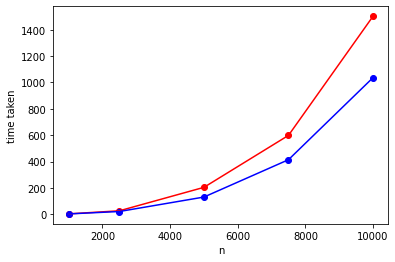

In [ ]:
import matplotlib.pyplot as plt
plt.plot([1000,2500,5000,7500,10000],[2.7001750899999024, 26.16164693799965, 204.0158077899996, 598.2925532790005, 1502.1173435370001],color='r',label='time taken by BFGS when initial b=identity')
plt.plot([1000,2500,5000,7500,10000],[2.4381770199997845, 20.74110754799949, 130.40629342300053, 413.7088565109989, 1036.2711338219997],color='b',label="time taken by newtons method")
plt.scatter([1000,2500,5000,7500,10000],[2.7001750899999024, 26.16164693799965, 204.0158077899996, 598.2925532790005, 1502.1173435370001],color='r',label='time taken by BFGS when initial b=identity')
plt.scatter([1000,2500,5000,7500,10000],[2.4381770199997845, 20.74110754799949, 130.40629342300053, 413.7088565109989, 1036.2711338219997],color='b',label="time taken by newtons method")
plt.xlabel('n')
plt.ylabel('time taken')
plt.show()

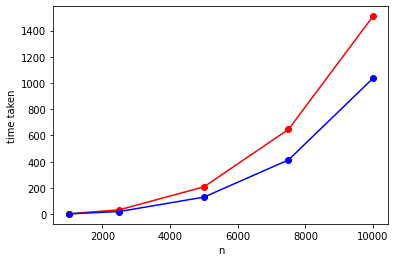

In [ ]:
import matplotlib.pyplot as plt
plt.plot([1000,2500,5000,7500,10000],[3.65802336500019, 33.828191198999775, 208.70273356600046, 646.7618323429997, 1508.7425933490003],color='r',label='time taken by BFGS when inverse of hessian is considered as initial b')
plt.plot([1000,2500,5000,7500,10000],[2.4381770199997845, 20.74110754799949, 130.40629342300053, 413.7088565109989, 1036.2711338219997],color='b',label="time taken by newtons method")
plt.scatter([1000,2500,5000,7500,10000],[3.65802336500019, 33.828191198999775, 208.70273356600046, 646.7618323429997, 1508.7425933490003],color='r',label='time taken by BFGS when inverse of hessian is considered as initial b')
plt.scatter([1000,2500,5000,7500,10000],[2.4381770199997845, 20.74110754799949, 130.40629342300053, 413.7088565109989, 1036.2711338219997],color='b',label="time taken by newtons method")
plt.xlabel('n')
plt.ylabel('time taken')
plt.show()

$\huge{solution \ \ \ \ 1.6}$

as we can see from above graph for each n time taken by newtons method is less compare to time taken by BFGS  

so here we can say that newtons method work better compare to BFGS for our problem 

but it is not happen in general some time inverse of hessian matrix calculation is takes too much time in that case BFGS perform better compare to newtons like question 1

so we can conclude that when inverse of hessian finding takes less time then newtons method is better compare to BFGS but when inverse of hessian calculation takes too much time in that case BFGS is good algorithm  